<H1>Uniform model for inhibitory synaptic connections motifs</H1>
We will test if the number of connectivity motifs found experimentally can be explained by the average connectivity found in the sample(i.e. null hypothesis is that the connection probability is uniform). For that, we count the number of inhibitory connectivity motifs (electrical and chemical) and test whether this number is expected assuming random realizations of a uniform connection probability model.

In [1]:
# loading python modules
from __future__ import division

import numpy as np

from matplotlib.pyplot import figure
from terminaltables import AsciiTable 

In [2]:
# loading custom writen modules
from inet import DataLoader
from inet.plots import barplot
from simulations import IIUniformModel # simulation is a local module!

In [3]:
# use the dataset to create the null hypothesis
mydataset = DataLoader('../data/PV')

unimodel = IIUniformModel(mydataset)

/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 2_170411_02.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 1_160201_01.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 1_171128_02.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 1_171120_03.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 1_171124_02.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 2_171127_02.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 2_171116_02.dist n

 211 syn  files loaded
40 recordings with 2 PV-cells
 9 recordings with 3 PV-cells
 1 recordings with 4 PV-cells


/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 2_171102_01.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 1_171115_02.dist not found
  warnings.warn(filename + ' not found')
/home/jguzman/.local/lib/python2.7/site-packages/inet/loader.py:194: UserWarning: 2_171124_01.dist not found
  warnings.warn(filename + ' not found')


<H2> Calculate empirical probabilities of inhibitory connectivity motifs </H2>
<P> It will be used to create the null hypothesis</P>

In [4]:
PC = mydataset.motif.ii_chem_found/mydataset.motif.ii_chem_tested
PE = mydataset.motif.ii_elec_found/mydataset.motif.ii_elec_tested

Pbid  = mydataset.motif.ii_c2_found/mydataset.motif.ii_c2_tested
Pdiv = mydataset.motif.ii_div_found/mydataset.motif.ii_div_tested
Pcon = mydataset.motif.ii_con_found/mydataset.motif.ii_con_tested
Plin = mydataset.motif.ii_lin_found/mydataset.motif.ii_lin_tested

PC1E = mydataset.motif.ii_c1e_found/mydataset.motif.ii_c1e_tested
PC2E = mydataset.motif.ii_c2e_found/mydataset.motif.ii_c2e_tested

info = [
    ['key', 'Type', 'Motif', 'Probability'],
    ['ii_chem', 'P(C)', 'chemical synapse',PC ],
    ['ii_elec', 'P(E)', 'electrical synapse',PE ],
    ['','',''],
    ['ii_c2', 'P(C U C)','bidirectional chemical synapse',Pbid],
    ['ii_con', 'Pcon', 'convergent inhibitory motifs', Pcon],
    ['ii_div', 'Pdiv', 'divergent inhibitory motifs', Pdiv],
    ['ii_lin', 'Plin', 'linear inhibitory motifs', Plin],
    ['',''],
    ['ii_c1e', 'P(C U E)', 'electrical and unidirectional chemical', PC1E],
    ['ii_c2e', 'P(2C U E):','electrical and bidirectional chemical', PC2E],

]
print(AsciiTable(info).table)

+---------+------------+----------------------------------------+-----------------+
| key     | Type       | Motif                                  | Probability     |
+---------+------------+----------------------------------------+-----------------+
| ii_chem | P(C)       | chemical synapse                       | 0.301369863014  |
| ii_elec | P(E)       | electrical synapse                     | 0.452054794521  |
|         |            |                                        |                 |
| ii_c2   | P(C U C)   | bidirectional chemical synapse         | 0.191780821918  |
| ii_con  | Pcon       | convergent inhibitory motifs           | 0.025641025641  |
| ii_div  | Pdiv       | divergent inhibitory motifs            | 0.0769230769231 |
| ii_lin  | Plin       | linear inhibitory motifs               | 0.0384615384615 |
|         |            |                                        |                 |
| ii_c1e  | P(C U E)   | electrical and unidirectional chemical | 0.19178082

<H2> Simulate synapses with uniform distribution</H2>

<P>
We simulate a random but uniform connection probability, which is adjusted to the empirical probability found in the recordings. To evaluate that the simulations are correct, we calculate analytically the expected number of chemical and electrical connections in the simulations. The analytical solutions and the simulations must be very close.


In [5]:
# %%timeit about 13 sec for 1,000 iterations
unimodel.run(n_iter = 1000, seed=0) # 1,000 random simulations

<H3>Testing null hypothesis</H3>
<P> The null hypothesis is that all motifs emerge form the individual probabilities of chemical (PC) and electrical (PE) synapses</P>

In [6]:
info = [
    ['Type', 'Analytical', 'Simulation', 'Observation'],
    ['ii_chem', PC*mydataset.motif['ii_chem']['tested'], unimodel.nchem.mean(), mydataset.motif.ii_chem_found ],
    ['ii_elec', PE*mydataset.motif['ii_elec']['tested'], unimodel.nelec.mean(), mydataset.motif.ii_elec_found ],
    [''],
    ['ii_bid', PC*PC*mydataset.motif['ii_c2']['tested'],  unimodel.nbid.mean(), mydataset.motif.ii_c2_found  ],
    ['ii_con', PC*PC*mydataset.motif['ii_con']['tested'], unimodel.ncon.mean(), mydataset.motif.ii_con_found ],
    ['ii_div', PC*PC*mydataset.motif['ii_div']['tested'], unimodel.ndiv.mean(), mydataset.motif.ii_div_found ],
    ['ii_lin', PC*PC*mydataset.motif['ii_lin']['tested'], unimodel.nlin.mean(), mydataset.motif.ii_lin_found ],
    [''],
    ['ii_c1e', PC*PE*mydataset.motif['ii_c1e']['tested'],  unimodel.nc1e.mean(), mydataset.motif.ii_c1e_found ],
    ['ii_c2e', PC*PC*PE*mydataset.motif['ii_c2e']['tested'],  unimodel.nc2e.mean(), mydataset.motif.ii_c2e_found  ]
]
print(AsciiTable(info).table)

+---------+---------------+------------+-------------+
| Type    | Analytical    | Simulation | Observation |
+---------+---------------+------------+-------------+
| ii_chem | 44.0          | 43.844     | 44          |
| ii_elec | 33.0          | 32.965     | 33          |
|         |               |            |             |
| ii_bid  | 6.6301369863  | 6.504      | 14          |
| ii_con  | 3.54212797898 | 3.469      | 1           |
| ii_div  | 3.54212797898 | 3.479      | 3           |
| ii_lin  | 7.08425595797 | 6.915      | 3           |
|         |               |            |             |
| ii_c1e  | 19.8904109589 | 19.859     | 28          |
| ii_c2e  | 2.99718521299 | 2.93       | 10          |
+---------+---------------+------------+-------------+



<H3>Calculating P values</H3>
<P> for the null-hypothese</P>

In [7]:
pii_chem = len(unimodel.nchem[unimodel.nchem > mydataset.motif.ii_chem_found]) / unimodel.nchem.size
pii_elec = len(unimodel.nelec[unimodel.nelec > mydataset.motif.ii_elec_found])/ unimodel.nelec.size

pii_bid =    len(unimodel.nbid[unimodel.nbid > mydataset.motif.ii_c2_found])/ unimodel.nbid.size
pii_con =   len(unimodel.ncon[unimodel.ncon < mydataset.motif.ii_con_found])/unimodel.ncon.size # under-rep
pii_div =   len(unimodel.ndiv[unimodel.ndiv > mydataset.motif.ii_div_found])/unimodel.ndiv.size
pii_lin = len(unimodel.nlin[unimodel.nlin < mydataset.motif.ii_lin_found])/unimodel.nlin.size # under-rep

pii_c1e = len(unimodel.nc1e[unimodel.nc1e > mydataset.motif.ii_c1e_found])/ unimodel.nc1e.size
pii_c2e = len(unimodel.nc2e[unimodel.nc2e > mydataset.motif.ii_c2e_found])/ unimodel.nc2e.size

In [8]:
info = [
    ['Syn Motif', 'Simulation', 'Observation', 'P value'], 
    ['chemical',   unimodel.nchem.mean(),  mydataset.motif['ii_chem']['found'], pii_chem],
    ['electrical', unimodel.nelec.mean(),  mydataset.motif['ii_elec']['found'], pii_elec],
    [''],
    ['2 chem',     unimodel.nbid.mean(), mydataset.motif['ii_c2']['found'] , pii_bid],
    ['convergent', unimodel.ncon.mean(), mydataset.motif['ii_con']['found'], pii_con],
    ['divergent',  unimodel.ndiv.mean(), mydataset.motif['ii_div']['found'], pii_div],
    ['chains',     unimodel.nlin.mean(), mydataset.motif['ii_lin']['found'], pii_lin],
    [''],
    ['1 chem + elec', unimodel.nc1e.mean(),  mydataset.motif['ii_c1e']['found'], pii_c1e],
    ['2 chem + elec', unimodel.nc2e.mean(),  mydataset.motif['ii_c2e']['found'], pii_c2e],
     ]
print(AsciiTable(info).table)

+---------------+------------+-------------+---------+
| Syn Motif     | Simulation | Observation | P value |
+---------------+------------+-------------+---------+
| chemical      | 43.844     | 44          | 0.451   |
| electrical    | 32.965     | 33          | 0.441   |
|               |            |             |         |
| 2 chem        | 6.504      | 14          | 0.001   |
| convergent    | 3.469      | 1           | 0.026   |
| divergent     | 3.479      | 3           | 0.457   |
| chains        | 6.915      | 3           | 0.064   |
|               |            |             |         |
| 1 chem + elec | 19.859     | 28          | 0.029   |
| 2 chem + elec | 2.93       | 10          | 0.0     |
+---------------+------------+-------------+---------+


<H2> Bar plots for estatistical significance</H2>

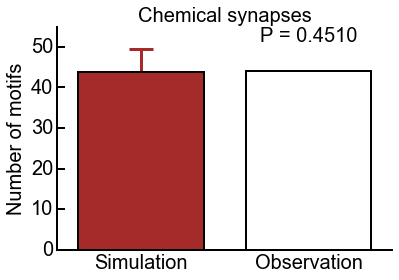

In [9]:
# This is our null hypothesis
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nchem, n_found = mydataset.motif.ii_chem_found, larger=1);
ax.set_title('Chemical synapses', size=20);
ax.set_ylim(ymax=55);
ax.tick_params(labelsize=20)

fig.savefig('ii_chem.pdf')

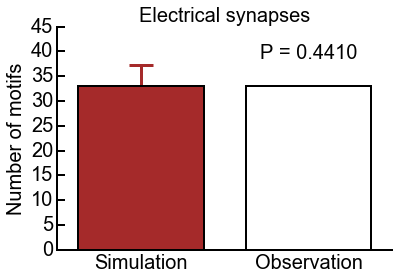

In [10]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nelec, n_found = mydataset.motif.ii_elec_found, larger=1);
ax.set_title('Electrical synapses',  size=20);
ax.set_ylim(ymax=45);
ax.tick_params(labelsize=20)

fig.savefig('ii_elec.pdf')

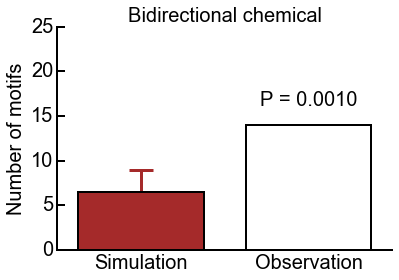

In [11]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nbid, n_found = mydataset.motif.ii_c2_found, larger=1);
ax.set_title('Bidirectional chemical',  size=20);
ax.set_ylim(ymax=25);
ax.tick_params(labelsize=20)

fig.savefig('ii_c2.pdf')

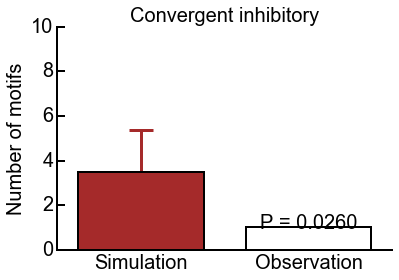

In [12]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.ncon, n_found = mydataset.motif.ii_con_found, larger=0);
ax.set_title('Convergent inhibitory',  size=20);
ax.set_ylim(ymin=0, ymax=10);
ax.tick_params(labelsize=20)

fig.savefig('ii_con.pdf')

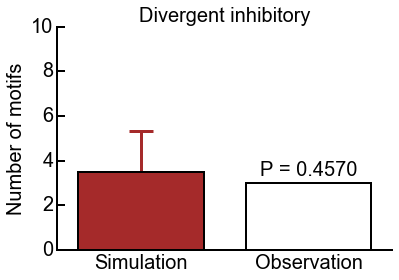

In [13]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.ndiv, n_found = mydataset.motif.ii_div_found, larger=1);
ax.set_title('Divergent inhibitory',  size=20);
ax.set_ylim(ymin=0, ymax=10);
ax.tick_params(labelsize=20)

fig.savefig('ii_div.pdf')

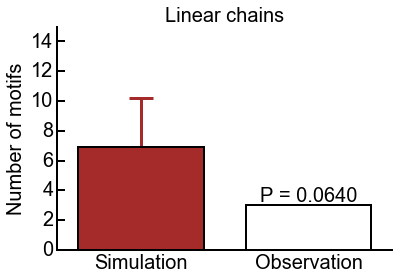

In [14]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nlin, n_found = mydataset.motif.ii_lin_found, larger=0);
ax.set_title('Linear chains',  size=20);
ax.set_ylim(ymin=0, ymax=15);
ax.tick_params(labelsize=20)

fig.savefig('ii_chain.pdf')

#pii_chain # change this value in the plot!

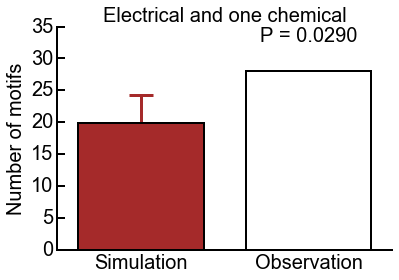

In [15]:
fig = figure() 
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nc1e, n_found = mydataset.motif.ii_c1e_found, larger=1);
ax.set_title('Electrical and one chemical',  size=20);
ax.set_ylim(ymax=35);
ax.tick_params(labelsize=20)

#fig.savefig('ii_c1e.pdf')

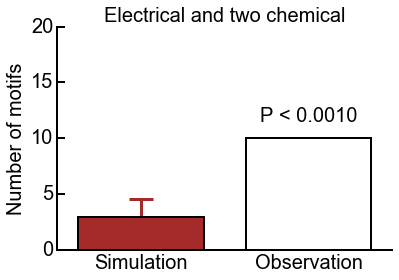

In [16]:
fig = figure(5)
ax = fig.add_subplot(111)

ax = barplot(simulation = unimodel.nc2e, n_found = mydataset.motif.ii_c2e_found, larger=1);
ax.set_title('Electrical and two chemical',  size=20);
ax.set_ylim(ymin  = 0, ymax=20);
ax.tick_params(labelsize=20)

#fig.savefig('ii_c2d.pdf')